In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pa=pd.read_csv('/content/drive/MyDrive/Scriptie uitvoeringsfase (workfolder) Uni/Processed data/pa.csv')

<ipython-input-3-49b8dfbf8344>:1: DtypeWarning: Columns (8,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  pa=pd.read_csv('/content/drive/MyDrive/Scriptie uitvoeringsfase (workfolder) Uni/Processed data/pa.csv')


In [ ]:
import pandas as pd

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set option to display all rows if needed
pd.set_option('display.max_rows', None)


In [ ]:
pa.shape

(697738, 63)

In [ ]:
severe_filter = pa[pa['SEVERE_x'] == 1]

# Calculate value counts for 'Combined Group' in the filtered DataFrame
combined_group_counts = severe_filter['Combined Group'].value_counts()


In [ ]:
print(combined_group_counts)

Combined Group
two-party: Cars and vans                                                              8817
multiparty: Cars and vans                                                             8121
multiparty: Cars and vans, Powered two-wheeler                                        7371
multiparty: Cars and vans, Cyclist                                                    6934
two-party: Cars and vans, Powered two-wheeler                                         6393
two-party: Cars and vans, Cyclist                                                     5503
multiparty: Cyclist                                                                   4597
multiparty: Powered two-wheeler                                                       4389
two-party: Powered two-wheeler                                                        3527
two-party: Cyclist                                                                    2214
multiparty: Cars and vans, Fixed object                                    

In [ ]:
pa.head()

,Unnamed: 0,VKL_NUMMER,DATUM_VKL,MND_NUMMER,UUR,MNE_CODE,AOL_ID,WSE_ID,BEBKOM,MAXSNELHD,WVL_ID,WVG_ID,WDK_ID,LGD_ID,WGD_CODE_1,FK_VELD5,GME_ID,PVE_CODE,IND_ALC,YEAR,MONTH,WEEKDAY,WEEKEND,BZD_VM,BZD_IF,BZD_TA,SEVERE_x,X_COORD,Y_COORD,TYPE,latitude,longitude,rounded_latitude,rounded_longitude,lat_bin,lon_bin,MeanWindSpeed_mps,MaxHourlyWindSpeed_mps,MinHourlyWindSpeed_mps,MaxWindGust_mps,MeanTemperature_C,MinTemperature_C,MaxTemperature_C,SunshineDuration_hrs,PrecipitationDuration_hrs,TotalDailyPrecip_mm,MeanSLPressure_hPa,MinVisibility_km,MaxVisibility_km,MeanCloudCover_oct,Gender Ratio,Party Category,Min Age Group,Max Age Group,Mode Age Group,Group,Combined Group,SEVERE_y,sorted_hexbin_id,hexbin_center_longitude,hexbin_center_latitude,hexbin_id,SEVERE
0,0,20130010053,20130226,2,18.0,J99,7,5.0,BI,50.0,2.0,2.0,1.0,NaN,D,JTE0186271101,599,ZH,J,2013,2,1,0,140,NaN,NaN,1,93338.000,435820.000,JTE,51.907460,4.491115,51.9075,4.4910,3,5,3.5,5.0,3.0,8.0,3.2,0.8,6.0,1.6,0.0,0.0,1032.0,22,50,8,"{'M': 0.5, 'V': 0.5}",two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",1,13,4.325648,52.121814,19,1
1,1,20130010061,20130224,2,7.0,C04,4,6.0,BU,80.0,1.0,2.0,3.0,NaN,S,HTT01943010270146,1621,ZH,NaN,2013,2,6,1,NaN,NaN,NaN,1,97058.901,450677.218,HTT,52.041388,4.542673,52.0415,4.5425,3,6,4.6,6.0,3.0,11.0,0.2,-1.1,0.9,0.0,10.7,2.4,1018.7,19,59,8,{'M': 1.0},two-party,6.0,6.0,6.0,"Cars and vans, Movable object","two-party: Cars and vans, Movable object",1,13,4.325648,52.121814,19,1
2,2,20130010088,20130110,1,19.0,H04,6,5.0,BI,50.0,1.0,1.0,2.0,NaN,R,JTE0247362007,437,NH,N,2013,1,3,0,120;160,NaN,NaN,1,123986.909,481118.041,JTE,52.317140,4.932369,52.3170,4.9325,4,8,3.0,5.0,2.0,8.0,5.5,-0.5,7.7,2.4,2.9,2.5,1013.2,31,70,7,{'M': 1.0},two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",1,18,4.969602,52.121814,21,1
3,3,20130010096,20130115,1,8.0,C04,4,5.0,BI,50.0,1.0,2.0,3.0,NaN,S,JTE0237369116,363,NH,N,2013,1,1,0,NaN,NaN,NaN,1,118841.485,484976.021,JTE,52.351498,4.856495,52.3515,4.8565,4,7,3.8,6.0,2.0,9.0,-3.0,-5.8,-1.6,0.0,10.5,4.4,1007.2,3,64,8,{'M': 1.0},two-party,2.0,8.0,2.0,"Heavy Vehicle, Movable object, Pedestrian","two-party: Heavy Vehicle, Movable object, Pede...",1,18,4.969602,52.121814,21,1
4,4,20130010109,20130201,2,20.0,H04,6,2.0,BU,80.0,3.0,2.0,NaN,NaN,O,WVK0230415015,361,NH,NaN,2013,2,4,0,NaN,NaN,NaN,1,116594.327,507278.647,WVK,52.551781,4.820956,52.5520,4.8210,5,7,3.2,5.0,1.0,10.0,4.9,1.8,7.4,0.0,8.1,5.2,1000.4,41,65,7,{'M': 1.0},two-party,7.0,7.0,7.0,Cars and vans,two-party: Cars and vans,1,12,4.647625,52.578229,3,1


In [ ]:
pa.columns

Index(['Unnamed: 0', 'VKL_NUMMER', 'DATUM_VKL', 'MND_NUMMER', 'UUR',
       'MNE_CODE', 'AOL_ID', 'WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WVL_ID',
       'WVG_ID', 'WDK_ID', 'LGD_ID', 'WGD_CODE_1', 'FK_VELD5', 'GME_ID',
       'PVE_CODE', 'IND_ALC', 'YEAR', 'MONTH', 'WEEKDAY', 'WEEKEND', 'BZD_VM',
       'BZD_IF', 'BZD_TA', 'SEVERE_x', 'X_COORD', 'Y_COORD', 'TYPE',
       'latitude', 'longitude', 'rounded_latitude', 'rounded_longitude',
       'lat_bin', 'lon_bin', 'MeanWindSpeed_mps', 'MaxHourlyWindSpeed_mps',
       'MinHourlyWindSpeed_mps', 'MaxWindGust_mps', 'MeanTemperature_C',
       'MinTemperature_C', 'MaxTemperature_C', 'SunshineDuration_hrs',
       'PrecipitationDuration_hrs', 'TotalDailyPrecip_mm',
       'MeanSLPressure_hPa', 'MinVisibility_km', 'MaxVisibility_km',
       'MeanCloudCover_oct', 'Gender Ratio', 'Party Category', 'Min Age Group',
       'Max Age Group', 'Mode Age Group', 'Group', 'Combined Group',
       'SEVERE_y', 'sorted_hexbin_id', 'hexbin_center_longitude',
  

In [ ]:
pip install astral


In [ ]:
print(pa['UUR'].head())
print(pa['UUR'].unique())


0    18.0
1     7.0
2    19.0
3     8.0
4    20.0
Name: UUR, dtype: float64
[18.  7. 19.  8. 20. 12.  6. 10. 17. 13.  1. 15.  2. 23. 16. 14.  3.  4.
 21. 11. nan  9.  5.  0. 22.]


In [ ]:
from astral import LocationInfo
from astral.sun import sun
import pandas as pd
from datetime import datetime, time

# Locatiegegevens voor De Bilt, Nederland
location = LocationInfo('De Bilt', 'Netherlands', 'Europe/Amsterdam', 52.117, 5.200)


pa['DATUM_VKL'] = pd.to_datetime(pa['DATUM_VKL'], format='%Y%m%d')
def convert_hour_to_time(h):
    if isinstance(h, time):
        return h
    elif pd.isna(h):
        return None
    else:
        try:
            # Convert to float first, then to integer, and finally to time
            hour = int(float(str(h).rstrip('.')))
            return time(hour)
        except Exception as e:
            print(f"Failed to convert {h}: {e}")
            return None
# Apply the conversion function to the 'UUR' column
pa['UUR'] = pa['UUR'].apply(convert_hour_to_time)

# Function to determine daylight status
def daglicht_status(row, location):
    if row['UUR'] is None:
        return 'unknown'  # Placeholder for rows with invalid or missing time data

    try:
        # Make date timezone-aware
        local_date = pd.Timestamp(row['DATUM_VKL']).tz_localize(location.timezone, ambiguous='NaT')
        # Create a timezone-aware datetime object
        tijd_als_datetime = pd.Timestamp(datetime.combine(local_date.date(), row['UUR'])).tz_localize(location.timezone, ambiguous='NaT')
    except Exception as e:
        return f'error: {e}'  # Return an error message if datetime combination fails

    try:
        # Determine daylight status based on sun positions
        s = sun(location.observer, date=local_date.date(), tzinfo=location.timezone)
        if s['sunrise'] < tijd_als_datetime < s['sunset']:
            return '1'  # Daylight
        elif s['dawn'] < tijd_als_datetime < s['sunrise'] or s['sunset'] < tijd_als_datetime < s['dusk']:
            return '3'  # Civil twilight
        else:
            return '2'  # Night
    except Exception as e:
        return f'error: {e}'  # Handle any errors during sun calculations

# Apply the daylight status function to the DataFrame
pa['Daylight_ID'] = pa.apply(lambda row: daglicht_status(row, location), axis=1)

# Print the result to verify
print(pa[['DATUM_VKL', 'UUR', 'Daylight_ID']].head())


   DATUM_VKL       UUR Daylight_ID
0 2013-02-26  18:00:00           1
1 2013-02-24  07:00:00           2
2 2013-01-10  19:00:00           2
3 2013-01-15  08:00:00           2
4 2013-02-01  20:00:00           2


In [ ]:
pa['Daylight_ID'].value_counts()

Daylight_ID
1          506691
2          146866
3           44167
unknown        14
Name: count, dtype: int64

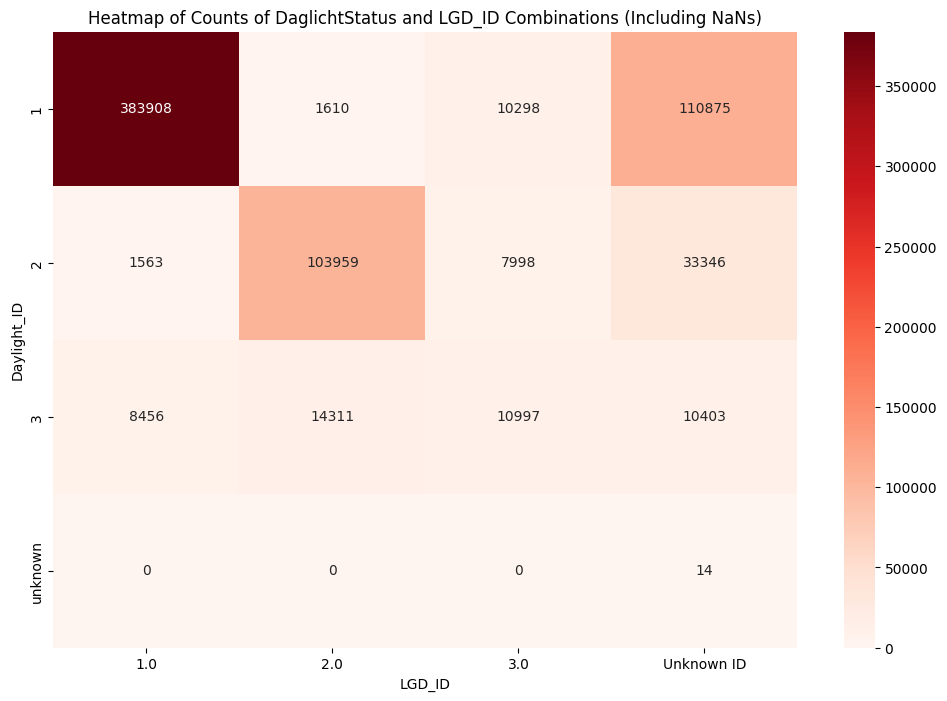

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert NaN values to a specific category
pa['Daylight_ID'] = pa['Daylight_ID'].fillna('Unknown Status')
pa['LGD_ID'] = pa['LGD_ID'].fillna('Unknown ID')

# Create a crosstabulation table that counts the combinations of DaglichtStatus and LDG_ID
pivot_table = pd.crosstab(pa['Daylight_ID'], pa['LGD_ID'])

# Plotting the Heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as necessary
ax = sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt="d")
plt.title('Heatmap of Counts of DaglichtStatus and LGD_ID Combinations (Including NaNs)')
plt.ylabel('Daylight_ID')
plt.xlabel('LGD_ID')
plt.show()


In [ ]:
# will use the astral one, to have it more systematic because different officers can have different opinions. Drop the empty ones Also change mapping so that twilight is in between daylight and dark

In [ ]:
original_count = pa.shape[0]

# Drop rows where the 'UUR' column contains NaN values
pa = pa.dropna(subset=['UUR'])

# Calculate the number of rows dropped
rows_dropped = original_count - pa.shape[0]

# Print the result
print(f"Number of rows dropped: {rows_dropped}")


Number of rows dropped: 14


In [ ]:
pa.drop(['Unnamed: 0','DATUM_VKL','SEVERE_y','X_COORD', 'Y_COORD','rounded_latitude', 'rounded_longitude',
       'lat_bin', 'lon_bin','MinHourlyWindSpeed_mps','MinVisibility_km','FK_VELD5','LGD_ID'],axis=1,inplace=True)

In [ ]:
pa.head()

,VKL_NUMMER,MND_NUMMER,UUR,MNE_CODE,AOL_ID,WSE_ID,BEBKOM,MAXSNELHD,WVL_ID,WVG_ID,WDK_ID,WGD_CODE_1,GME_ID,PVE_CODE,IND_ALC,YEAR,MONTH,WEEKDAY,WEEKEND,BZD_VM,BZD_IF,BZD_TA,SEVERE_x,TYPE,latitude,longitude,MeanWindSpeed_mps,MaxHourlyWindSpeed_mps,MaxWindGust_mps,MeanTemperature_C,MinTemperature_C,MaxTemperature_C,SunshineDuration_hrs,PrecipitationDuration_hrs,TotalDailyPrecip_mm,MeanSLPressure_hPa,MaxVisibility_km,MeanCloudCover_oct,Gender Ratio,Party Category,Min Age Group,Max Age Group,Mode Age Group,Group,Combined Group,sorted_hexbin_id,hexbin_center_longitude,hexbin_center_latitude,hexbin_id,SEVERE,Daylight_ID
0,20130010053,2,18:00:00,J99,7,5.0,BI,50.0,2.0,2.0,1.0,D,599,ZH,J,2013,2,1,0,140,NaN,NaN,1,JTE,51.907460,4.491115,3.5,5.0,8.0,3.2,0.8,6.0,1.6,0.0,0.0,1032.0,50,8,"{'M': 0.5, 'V': 0.5}",two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",13,4.325648,52.121814,19,1,1
1,20130010061,2,07:00:00,C04,4,6.0,BU,80.0,1.0,2.0,3.0,S,1621,ZH,NaN,2013,2,6,1,NaN,NaN,NaN,1,HTT,52.041388,4.542673,4.6,6.0,11.0,0.2,-1.1,0.9,0.0,10.7,2.4,1018.7,59,8,{'M': 1.0},two-party,6.0,6.0,6.0,"Cars and vans, Movable object","two-party: Cars and vans, Movable object",13,4.325648,52.121814,19,1,2
2,20130010088,1,19:00:00,H04,6,5.0,BI,50.0,1.0,1.0,2.0,R,437,NH,N,2013,1,3,0,120;160,NaN,NaN,1,JTE,52.317140,4.932369,3.0,5.0,8.0,5.5,-0.5,7.7,2.4,2.9,2.5,1013.2,70,7,{'M': 1.0},two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",18,4.969602,52.121814,21,1,2
3,20130010096,1,08:00:00,C04,4,5.0,BI,50.0,1.0,2.0,3.0,S,363,NH,N,2013,1,1,0,NaN,NaN,NaN,1,JTE,52.351498,4.856495,3.8,6.0,9.0,-3.0,-5.8,-1.6,0.0,10.5,4.4,1007.2,64,8,{'M': 1.0},two-party,2.0,8.0,2.0,"Heavy Vehicle, Movable object, Pedestrian","two-party: Heavy Vehicle, Movable object, Pede...",18,4.969602,52.121814,21,1,2
4,20130010109,2,20:00:00,H04,6,2.0,BU,80.0,3.0,2.0,NaN,O,361,NH,NaN,2013,2,4,0,NaN,NaN,NaN,1,WVK,52.551781,4.820956,3.2,5.0,10.0,4.9,1.8,7.4,0.0,8.1,5.2,1000.4,65,7,{'M': 1.0},two-party,7.0,7.0,7.0,Cars and vans,two-party: Cars and vans,12,4.647625,52.578229,3,1,2


In [ ]:
pa.columns

Index(['VKL_NUMMER', 'MND_NUMMER', 'UUR', 'MNE_CODE', 'AOL_ID', 'WSE_ID',
       'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WDK_ID', 'WGD_CODE_1',
       'GME_ID', 'PVE_CODE', 'IND_ALC', 'YEAR', 'MONTH', 'WEEKDAY', 'WEEKEND',
       'BZD_VM', 'BZD_IF', 'BZD_TA', 'SEVERE_x', 'TYPE', 'latitude',
       'longitude', 'MeanWindSpeed_mps', 'MaxHourlyWindSpeed_mps',
       'MaxWindGust_mps', 'MeanTemperature_C', 'MinTemperature_C',
       'MaxTemperature_C', 'SunshineDuration_hrs', 'PrecipitationDuration_hrs',
       'TotalDailyPrecip_mm', 'MeanSLPressure_hPa', 'MaxVisibility_km',
       'MeanCloudCover_oct', 'Gender Ratio', 'Party Category', 'Min Age Group',
       'Max Age Group', 'Mode Age Group', 'Group', 'Combined Group',
       'sorted_hexbin_id', 'hexbin_center_longitude', 'hexbin_center_latitude',
       'hexbin_id', 'SEVERE', 'Daylight_ID'],
      dtype='object')

In [ ]:
#alleen voetganger oversteekplaats, verder niet heel informatief:
pa.drop(columns=['BZD_VM','BZD_TA','GME_ID'],axis=1, inplace=True)

In [ ]:
#Only 6 values |(onverharde wegen)
pa = pa[pa['WVG_ID'] != '5.0']


In [ ]:
pa['WGD_CODE_1'] = pa['WGD_CODE_1'].astype(str)
pa['SEVERE'] = pa['SEVERE'].astype(str)


In [ ]:
#Only 175 instances (onbekend)) non of which are SEVERE = 1
pa = pa[pa['WGD_CODE_1'] != 'O']


In [ ]:
pa.columns

Index(['VKL_NUMMER', 'MND_NUMMER', 'UUR', 'MNE_CODE', 'AOL_ID', 'WSE_ID',
       'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WDK_ID', 'WGD_CODE_1',
       'PVE_CODE', 'IND_ALC', 'YEAR', 'MONTH', 'WEEKDAY', 'WEEKEND', 'BZD_IF',
       'SEVERE_x', 'TYPE', 'latitude', 'longitude', 'MeanWindSpeed_mps',
       'MaxHourlyWindSpeed_mps', 'MaxWindGust_mps', 'MeanTemperature_C',
       'MinTemperature_C', 'MaxTemperature_C', 'SunshineDuration_hrs',
       'PrecipitationDuration_hrs', 'TotalDailyPrecip_mm',
       'MeanSLPressure_hPa', 'MaxVisibility_km', 'MeanCloudCover_oct',
       'Gender Ratio', 'Party Category', 'Min Age Group', 'Max Age Group',
       'Mode Age Group', 'Group', 'Combined Group', 'sorted_hexbin_id',
       'hexbin_center_longitude', 'hexbin_center_latitude', 'hexbin_id',
       'SEVERE', 'Daylight_ID'],
      dtype='object')

In [ ]:
columns_to_drop=['hexbin_center_longitude', 'hexbin_center_latitude', 'hexbin_id','latitude', 'longitude']

pa.drop(columns=columns_to_drop,axis=1,inplace=True)

<ipython-input-25-715d2395cbd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa.drop(columns=columns_to_drop,axis=1,inplace=True)


In [ ]:
# Bijzonderheden infrastructuur kan interessant zijn maar valt niet binnen de scope ( relatief klein aantal waarop dit toepassing heeft)
pa.drop('BZD_IF',axis=1,inplace=True)

In [ ]:
pa.columns

Index(['VKL_NUMMER', 'MND_NUMMER', 'UUR', 'MNE_CODE', 'AOL_ID', 'WSE_ID',
       'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WDK_ID', 'WGD_CODE_1',
       'PVE_CODE', 'IND_ALC', 'YEAR', 'MONTH', 'WEEKDAY', 'WEEKEND',
       'SEVERE_x', 'TYPE', 'MeanWindSpeed_mps', 'MaxHourlyWindSpeed_mps',
       'MaxWindGust_mps', 'MeanTemperature_C', 'MinTemperature_C',
       'MaxTemperature_C', 'SunshineDuration_hrs', 'PrecipitationDuration_hrs',
       'TotalDailyPrecip_mm', 'MeanSLPressure_hPa', 'MaxVisibility_km',
       'MeanCloudCover_oct', 'Gender Ratio', 'Party Category', 'Min Age Group',
       'Max Age Group', 'Mode Age Group', 'Group', 'Combined Group',
       'sorted_hexbin_id', 'SEVERE', 'Daylight_ID'],
      dtype='object')

In [ ]:
pa.head()

,VKL_NUMMER,MND_NUMMER,UUR,MNE_CODE,AOL_ID,WSE_ID,BEBKOM,MAXSNELHD,WVL_ID,WVG_ID,WDK_ID,WGD_CODE_1,PVE_CODE,IND_ALC,YEAR,MONTH,WEEKDAY,WEEKEND,SEVERE_x,TYPE,MeanWindSpeed_mps,MaxHourlyWindSpeed_mps,MaxWindGust_mps,MeanTemperature_C,MinTemperature_C,MaxTemperature_C,SunshineDuration_hrs,PrecipitationDuration_hrs,TotalDailyPrecip_mm,MeanSLPressure_hPa,MaxVisibility_km,MeanCloudCover_oct,Gender Ratio,Party Category,Min Age Group,Max Age Group,Mode Age Group,Group,Combined Group,sorted_hexbin_id,SEVERE,Daylight_ID
0,20130010053,2,18:00:00,J99,7,5.0,BI,50.0,2.0,2.0,1.0,D,ZH,J,2013,2,1,0,1,JTE,3.5,5.0,8.0,3.2,0.8,6.0,1.6,0.0,0.0,1032.0,50,8,"{'M': 0.5, 'V': 0.5}",two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",13,1,1
1,20130010061,2,07:00:00,C04,4,6.0,BU,80.0,1.0,2.0,3.0,S,ZH,NaN,2013,2,6,1,1,HTT,4.6,6.0,11.0,0.2,-1.1,0.9,0.0,10.7,2.4,1018.7,59,8,{'M': 1.0},two-party,6.0,6.0,6.0,"Cars and vans, Movable object","two-party: Cars and vans, Movable object",13,1,2
2,20130010088,1,19:00:00,H04,6,5.0,BI,50.0,1.0,1.0,2.0,R,NH,N,2013,1,3,0,1,JTE,3.0,5.0,8.0,5.5,-0.5,7.7,2.4,2.9,2.5,1013.2,70,7,{'M': 1.0},two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",18,1,2
3,20130010096,1,08:00:00,C04,4,5.0,BI,50.0,1.0,2.0,3.0,S,NH,N,2013,1,1,0,1,JTE,3.8,6.0,9.0,-3.0,-5.8,-1.6,0.0,10.5,4.4,1007.2,64,8,{'M': 1.0},two-party,2.0,8.0,2.0,"Heavy Vehicle, Movable object, Pedestrian","two-party: Heavy Vehicle, Movable object, Pede...",18,1,2
5,20130010117,1,08:00:00,H04,6,1.0,BI,50.0,1.0,2.0,3.0,S,ZH,NaN,2013,1,0,0,1,WVK,3.5,4.0,7.0,-2.0,-2.8,-1.1,0.0,1.2,0.4,998.6,50,8,{'M': 1.0},two-party,8.0,8.0,8.0,"Cars and vans, Powered two-wheeler","two-party: Cars and vans, Powered two-wheeler",13,1,3


In [ ]:
pa['Gender Ratio'] = pa['Gender Ratio'].apply(eval)

# Now, use json_normalize to convert the dictionaries into separate columns
gender_ratio_df = pd.json_normalize(pa['Gender Ratio'])

# Join the new columns back to the original DataFrame
pa = pa.join(gender_ratio_df)

# Optionally, if you want to drop the original 'Gender Ratio' column, you can do so
pa = pa.drop('Gender Ratio', axis=1)

In [ ]:
pa['Ratio_male']=pa['M'].fillna(0)
pa['Ratio_female']=pa['V'].fillna(0)

pa.drop(columns=['M','V'],axis=1,inplace=True)


In [ ]:
pa['IND_ALC'].replace({'J': 1, 'N': 0}, inplace=True)

# Replace NaN values with 0
pa['IND_ALC'].fillna(0, inplace=True)

In [ ]:
pa.head()

,VKL_NUMMER,MND_NUMMER,UUR,MNE_CODE,AOL_ID,WSE_ID,BEBKOM,MAXSNELHD,WVL_ID,WVG_ID,WDK_ID,WGD_CODE_1,PVE_CODE,IND_ALC,YEAR,MONTH,WEEKDAY,WEEKEND,SEVERE_x,TYPE,MeanWindSpeed_mps,MaxHourlyWindSpeed_mps,MaxWindGust_mps,MeanTemperature_C,MinTemperature_C,MaxTemperature_C,SunshineDuration_hrs,PrecipitationDuration_hrs,TotalDailyPrecip_mm,MeanSLPressure_hPa,MaxVisibility_km,MeanCloudCover_oct,Party Category,Min Age Group,Max Age Group,Mode Age Group,Group,Combined Group,sorted_hexbin_id,SEVERE,Daylight_ID,Ratio_male,Ratio_female
0,20130010053,2,18:00:00,J99,7,5.0,BI,50.0,2.0,2.0,1.0,D,ZH,1.0,2013,2,1,0,1,JTE,3.5,5.0,8.0,3.2,0.8,6.0,1.6,0.0,0.0,1032.0,50,8,two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",13,1,1,0.5,0.5
1,20130010061,2,07:00:00,C04,4,6.0,BU,80.0,1.0,2.0,3.0,S,ZH,0.0,2013,2,6,1,1,HTT,4.6,6.0,11.0,0.2,-1.1,0.9,0.0,10.7,2.4,1018.7,59,8,two-party,6.0,6.0,6.0,"Cars and vans, Movable object","two-party: Cars and vans, Movable object",13,1,2,1.0,0.0
2,20130010088,1,19:00:00,H04,6,5.0,BI,50.0,1.0,1.0,2.0,R,NH,0.0,2013,1,3,0,1,JTE,3.0,5.0,8.0,5.5,-0.5,7.7,2.4,2.9,2.5,1013.2,70,7,two-party,6.0,7.0,6.0,"Cars and vans, Cyclist","two-party: Cars and vans, Cyclist",18,1,2,1.0,0.0
3,20130010096,1,08:00:00,C04,4,5.0,BI,50.0,1.0,2.0,3.0,S,NH,0.0,2013,1,1,0,1,JTE,3.8,6.0,9.0,-3.0,-5.8,-1.6,0.0,10.5,4.4,1007.2,64,8,two-party,2.0,8.0,2.0,"Heavy Vehicle, Movable object, Pedestrian","two-party: Heavy Vehicle, Movable object, Pede...",18,1,2,1.0,0.0
5,20130010117,1,08:00:00,H04,6,1.0,BI,50.0,1.0,2.0,3.0,S,ZH,0.0,2013,1,0,0,1,WVK,3.5,4.0,7.0,-2.0,-2.8,-1.1,0.0,1.2,0.4,998.6,50,8,two-party,8.0,8.0,8.0,"Cars and vans, Powered two-wheeler","two-party: Cars and vans, Powered two-wheeler",13,1,3,1.0,0.0


In [ ]:
def convert_hour_to_int(h):
    if isinstance(h, time):
        return h.hour
    elif pd.isna(h):
        return None
    else:
        try:
            return int(str(h).split(':')[0])
        except Exception as e:
            print(f"Failed to convert {h}: {e}")
            return None

# Apply the conversion function to the 'UUR' column
pa['HOUR'] = pa['UUR'].apply(convert_hour_to_int)

pa.drop(columns=['UUR'],axis=1,inplace=True)

In [ ]:
len(pa.columns)

43

In [ ]:
# Calculate value counts for 'Combined Group' column
value_counts = pa['Combined Group'].value_counts()

# Identify values with count lower than 5k
low_counts = value_counts[value_counts < 5000].index

# Replace values with count lower than 5k with 'Other'
pa.loc[pa['Combined Group'].isin(low_counts), 'Combined Group'] = 'Other'

# Print the updated value counts
print(pa['Combined Group'].value_counts())


Combined Group
multiparty: Cars and vans                           182557
two-party: Cars and vans                            126422
Other                                                76915
multiparty: Cars and vans, Powered two-wheeler       45037
multiparty: Cars and vans, Cyclist                   37171
single-party: Cars and vans                          37128
two-party: Cars and vans, Powered two-wheeler        26053
multiparty: Cars and vans, Fixed object              22988
multiparty: Cars and vans, Heavy Vehicle             21384
multiparty: Powered two-wheeler                      18468
two-party: Cars and vans, Cyclist                    17023
multiparty: Cars and vans, Movable object            15411
two-party: Powered two-wheeler                       12517
two-party: Cars and vans, Heavy Vehicle              12449
multiparty: Cyclist                                  11804
two-party: Cars and vans, Fixed object               10102
multiparty: Cyclist, Powered two-wheeler 

In [ ]:
pa.drop('MND_NUMMER',axis=1,inplace=True)

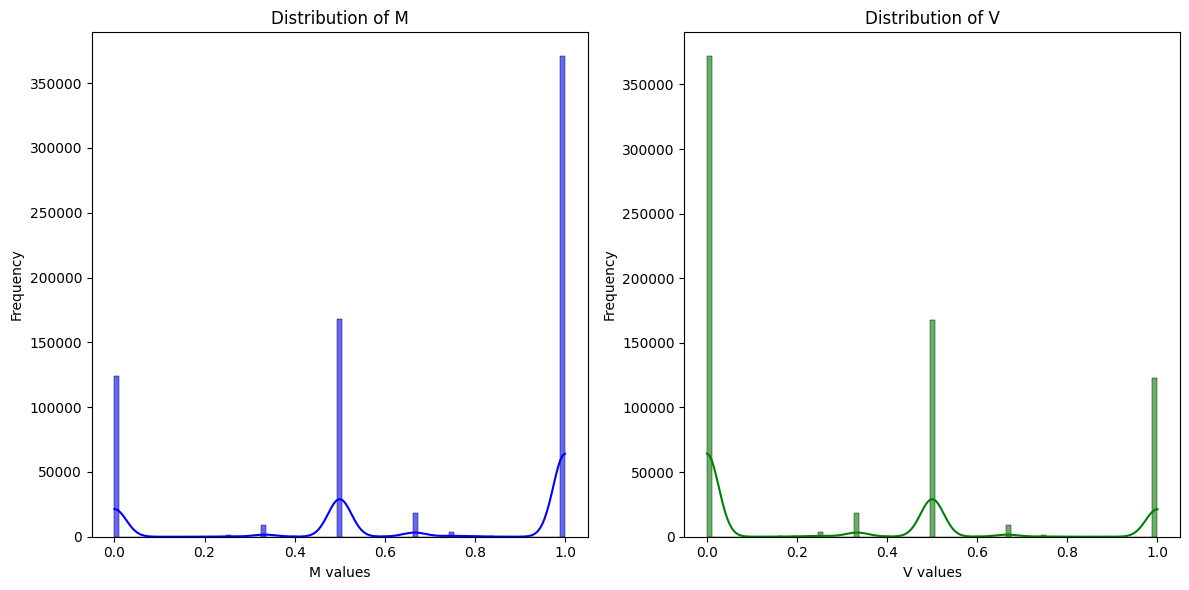

In [ ]:
# Plotting the distributions
plt.figure(figsize=(12, 6))

# Histogram and density plot for 'M'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(pa['Ratio_male'], kde=True, color='blue', alpha=0.6)
plt.title('Distribution of M')
plt.xlabel('M values')
plt.ylabel('Frequency')

# Histogram and density plot for 'V'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(pa['Ratio_female'], kde=True, color='green', alpha=0.6)
plt.title('Distribution of V')
plt.xlabel('V values')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
pa['Ratio_female']=round(pa['Ratio_female'],2)
pa['Ratio_male']=round(pa['Ratio_male'],2)

In [ ]:
pa.drop('SEVERE_x',axis=1,inplace=True)

In [ ]:
pa['Combined Group'].value_counts()

Combined Group
multiparty: Cars and vans                           182557
two-party: Cars and vans                            126422
Other                                                76915
multiparty: Cars and vans, Powered two-wheeler       45037
multiparty: Cars and vans, Cyclist                   37171
single-party: Cars and vans                          37128
two-party: Cars and vans, Powered two-wheeler        26053
multiparty: Cars and vans, Fixed object              22988
multiparty: Cars and vans, Heavy Vehicle             21384
multiparty: Powered two-wheeler                      18468
two-party: Cars and vans, Cyclist                    17023
multiparty: Cars and vans, Movable object            15411
two-party: Powered two-wheeler                       12517
two-party: Cars and vans, Heavy Vehicle              12449
multiparty: Cyclist                                  11804
two-party: Cars and vans, Fixed object               10102
multiparty: Cyclist, Powered two-wheeler 

In [ ]:
pa_processed=pa

In [ ]:
columns_to_check = ['WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WDK_ID']
# Before dropping, you may want to know the size of your DataFrame
print("Original DataFrame size:", pa_processed.shape)

# Drop rows with any NaNs in the specified columns
pa_processed_cleaned = pa_processed.dropna(subset=columns_to_check)

# Check the size of the DataFrame after dropping rows
print("New DataFrame size after dropping NaNs:", pa_processed_cleaned.shape)


Original DataFrame size: (697551, 41)
New DataFrame size after dropping NaNs: (538053, 41)


In [ ]:
initial_counts = pa_processed['SEVERE'].value_counts()
print("Initial counts of SEVERE:")
print(initial_counts)

# Columns with NaNs to check
columns_to_check = ['WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WDK_ID']

# Create a boolean series where True represents NaN in any of the specified columns
rows_with_nans = pa_processed[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to only these rows
nan_rows = pa_processed[rows_with_nans]

# Count the occurrences of each category in 'SEVERE' within these rows
severe_counts_in_nans = nan_rows['SEVERE'].value_counts()

# Calculate the percentage loss of 'SEVERE=1' and 'SEVERE=0'
percentage_loss = (severe_counts_in_nans / initial_counts) * 100

# Print the results
print("Percentage of SEVERE=1 and SEVERE=0 lost by removing rows with any NaNs in specified columns:")
print(percentage_loss)


Initial counts of SEVERE:
SEVERE
0    607666
1     89885
Name: count, dtype: int64
Percentage of SEVERE=1 and SEVERE=0 lost by removing rows with any NaNs in specified columns:
SEVERE
0    24.198820
1    13.851032
Name: count, dtype: float64


In [ ]:
# List of columns to check for NaNs
columns_to_check = ['WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WVL_ID', 'WVG_ID', 'WDK_ID']

# Drop rows where any of the specified columns have NaNs
pa_processed = pa_processed.dropna(subset=columns_to_check)

print("DataFrame after dropping rows with NaNs in specified columns:")
print(pa_processed)


DataFrame after dropping rows with NaNs in specified columns:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pa.columns

Index(['VKL_NUMMER', 'MNE_CODE', 'AOL_ID', 'WSE_ID', 'BEBKOM', 'MAXSNELHD',
       'WVL_ID', 'WVG_ID', 'WDK_ID', 'WGD_CODE_1', 'PVE_CODE', 'IND_ALC',
       'YEAR', 'MONTH', 'WEEKDAY', 'WEEKEND', 'TYPE', 'MeanWindSpeed_mps',
       'MaxHourlyWindSpeed_mps', 'MaxWindGust_mps', 'MeanTemperature_C',
       'MinTemperature_C', 'MaxTemperature_C', 'SunshineDuration_hrs',
       'PrecipitationDuration_hrs', 'TotalDailyPrecip_mm',
       'MeanSLPressure_hPa', 'MaxVisibility_km', 'MeanCloudCover_oct',
       'Party Category', 'Min Age Group', 'Max Age Group', 'Mode Age Group',
       'Group', 'Combined Group', 'sorted_hexbin_id', 'SEVERE', 'Daylight_ID',
       'Ratio_male', 'Ratio_female', 'HOUR'],
      dtype='object')

In [ ]:
# Column lists
nominal_columns = ['MNE_CODE','AOL_ID','BEBKOM','WVL_ID', 'WVG_ID', 'WDK_ID','WSE_ID', 'WGD_CODE_1', 'sorted_hexbin_id','YEAR','TYPE','Daylight_ID']

ordinal_columns = ['Daylight_ID','Min Age Group', 'Max Age Group', 'Mode Age Group']

numerical_columns=['MeanWindSpeed_mps', 'MaxHourlyWindSpeed_mps','MaxWindGust_mps', 'MeanTemperature_C', 'MinTemperature_C',
                   'MaxTemperature_C', 'SunshineDuration_hrs', 'PrecipitationDuration_hrs',
                   'MeanSLPressure_hPa', 'MaxVisibility_km','MeanCloudCover_oct','Ratio_male', 'Ratio_female','MAXSNELHD']

log_columns = ['TotalDailyPrecip_mm']

binary_columns=['IND_ALC', 'WEEKEND']

hour_column=['HOUR']

day_column = ['WEEKDAY']

month_column = ['MONTH']


In [ ]:
pa.columns

Index(['VKL_NUMMER', 'MNE_CODE', 'AOL_ID', 'WSE_ID', 'BEBKOM', 'MAXSNELHD',
       'WVL_ID', 'WVG_ID', 'WDK_ID', 'WGD_CODE_1', 'PVE_CODE', 'IND_ALC',
       'YEAR', 'MONTH', 'WEEKDAY', 'WEEKEND', 'TYPE', 'MeanWindSpeed_mps',
       'MaxHourlyWindSpeed_mps', 'MaxWindGust_mps', 'MeanTemperature_C',
       'MinTemperature_C', 'MaxTemperature_C', 'SunshineDuration_hrs',
       'PrecipitationDuration_hrs', 'TotalDailyPrecip_mm',
       'MeanSLPressure_hPa', 'MaxVisibility_km', 'MeanCloudCover_oct',
       'Party Category', 'Min Age Group', 'Max Age Group', 'Mode Age Group',
       'Group', 'Combined Group', 'sorted_hexbin_id', 'SEVERE', 'Daylight_ID',
       'Ratio_male', 'Ratio_female', 'HOUR'],
      dtype='object')

In [ ]:
all_columns = {
    'MNE_CODE', 'AOL_ID', 'WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WVL_ID',
       'WVG_ID', 'WDK_ID', 'WGD_CODE_1', 'IND_ALC', 'YEAR', 'MONTH', 'WEEKDAY',
       'WEEKEND', 'TYPE', 'MeanWindSpeed_mps', 'MaxHourlyWindSpeed_mps',
       'MaxWindGust_mps', 'MeanTemperature_C', 'MinTemperature_C',
       'MaxTemperature_C', 'SunshineDuration_hrs', 'PrecipitationDuration_hrs',
       'TotalDailyPrecip_mm', 'MeanSLPressure_hPa', 'MaxVisibility_km',
       'MeanCloudCover_oct', 'Party Category', 'Min Age Group',
       'Max Age Group', 'Mode Age Group', 'Group', 'Combined Group',
       'sorted_hexbin_id', 'SEVERE', 'Daylight_ID', 'Ratio_male',
       'Ratio_female', 'HOUR', 'Stratify_Key'
}

categorized_columns = set(nominal_columns + ordinal_columns + numerical_columns + log_columns + hour_column + day_column + month_column+binary_columns)

# Find uncategorized columns
uncategorized_columns = all_columns - categorized_columns
print("Uncategorized columns:", uncategorized_columns)

Uncategorized columns: {'Party Category', 'SEVERE', 'Group', 'Stratify_Key', 'Combined Group'}


In [ ]:
columns_to_drop = ['PVE_CODE', 'VKL_NUMMER']
pa.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
import numpy as np
import pandas as pd
import numpy as np

# Define the cyclical encoding function
def cyclical_encode(df, max_val):
    result = pd.DataFrame({
        df.columns[0] + '_sin': np.sin(2 * np.pi * df.iloc[:, 0] / max_val),
        df.columns[0] + '_cos': np.cos(2 * np.pi * df.iloc[:, 0] / max_val)
    })
    return result

# Applying FunctionTransformer with the correct setup
from sklearn.preprocessing import FunctionTransformer

hour_transformer = FunctionTransformer(cyclical_encode, kw_args={'max_val': 24}, validate=False)
weekday_transformer = FunctionTransformer(cyclical_encode, kw_args={'max_val': 7}, validate=False)
month_transformer = FunctionTransformer(cyclical_encode, kw_args={'max_val': 12}, validate=False)

# Setting up the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_columns),
        ('ord', OrdinalEncoder(), ordinal_columns),
        ('num', StandardScaler(), numerical_columns),
        ('log', FunctionTransformer(np.log1p),log_columns),
        ('hour_cyc', hour_transformer, ['HOUR']),
        ('weekday_cyc', weekday_transformer, ['WEEKDAY']),
        ('month_cyc', month_transformer, ['MONTH']),
        ('bin','passthrough',binary_columns)
    ],
    remainder='passthrough'  # To keep all other columns not listed
)


In [ ]:
from sklearn.model_selection import train_test_split

# Creating a stratification key in the 'pa_processed' DataFrame
pa_processed['Stratify_Key'] = pa_processed['SEVERE'].astype(str) + "_" + pa_processed['Combined Group'].astype(str)

columns_to_drop=['Group','Party Category']

pa_processed.drop(columns=columns_to_drop ,axis=1, inplace=True)


<ipython-input-51-6fa14927545e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_processed['Stratify_Key'] = pa_processed['SEVERE'].astype(str) + "_" + pa_processed['Combined Group'].astype(str)
<ipython-input-51-6fa14927545e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_processed.drop(columns=columns_to_drop ,axis=1, inplace=True)


In [ ]:
pa_processed.to_csv('/content/drive/MyDrive/Scriptie uitvoeringsfase (workfolder) Uni/Processed data/pa_cg.csv')